# Calendar data
Calendar data exploration, tag and will join back to listings


In [1]:
import os
import io
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read calendar
path = '../../data/new-york-city-airbnb-open-data/'
calendar_csv = os.path.join(path,'calendar.csv')

calendar = pd.read_csv(calendar_csv)

In [3]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11943,2020-03-14,t,$150.00,$150.00,1,730
1,2060,2020-03-14,t,$100.00,$100.00,1,730
2,2060,2020-03-15,t,$100.00,$100.00,1,730
3,2060,2020-03-16,t,$100.00,$100.00,1,730
4,2060,2020-03-17,t,$100.00,$100.00,1,730


In [4]:
#shape
calendar.shape

(18540540, 7)

In [5]:
#find null columns
calendar.isna().sum()

listing_id           0
date                 0
available            0
price             1268
adjusted_price    1268
minimum_nights       0
maximum_nights       0
dtype: int64

In [6]:
#drop null price records as they are only few
Drop_na = ['price']
calendar = calendar.dropna(subset=Drop_na)

In [7]:
#count unique calendar per listing, looks like all listings have 365 days
calendar.groupby('listing_id').agg({'date':'nunique'}).head()

,date
listing_id,
2060,365
2595,365
3831,365
5099,365
5114,365


# Currency conversion
This will remove dollars sign, comma and then convert to float

In [8]:
#function
def fix_currency(row):
    row = row.replace(',', '')
    row = row.replace('$', '')
    return row

In [9]:
colname = 'price'
calendar[colname] = calendar[colname].apply(lambda col: fix_currency(col)).astype(float)

In [11]:
calendar['price'].mean()

158.1586515910657

In [12]:
calendar['price'].min()

0.0

In [13]:
calendar['price'].max()

10000.0

In [14]:
#strange, why 0 dollar?, looks only around 1000 records, remove
filt = calendar['price']> 0
calendar = calendar[filt]

In [15]:
calendar.shape

(18538164, 7)

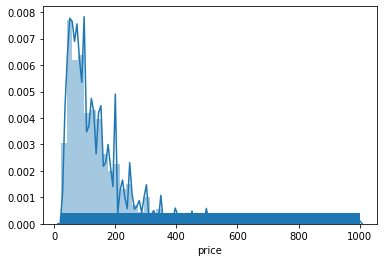

In [16]:
#graph price
filt = (calendar['price'] < 1000)& (calendar['price'] > 20)
sns.distplot(calendar['price'][filt], rug=True)

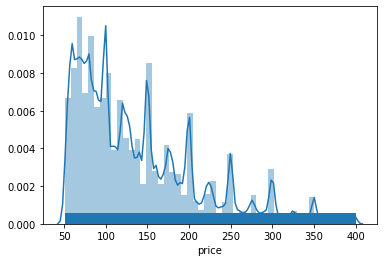

In [18]:
#looking at the grpah above, we should take out anyhting more than 400, lest' increas 20 to 50 on the min
filt = (calendar['price'] < 400)& (calendar['price'] > 50)
sns.distplot(calendar['price'][filt], rug=True)

In [21]:
#remove outliers price
filt = (calendar['price'] < 400)& (calendar['price'] > 50)
calendar = calendar[filt]

In [22]:
calendar.shape

(15168635, 7)

In [23]:
#read US holiday data
path = '../../data/new-york-city-airbnb-open-data/'
us_holiday_csv = os.path.join(path,'usholidays.csv')

us_holiday = pd.read_csv(us_holiday_csv)

In [24]:
us_holiday.head()

,Unnamed: 0,Date,Holiday
0,0,2010-12-31,New Year's Day
1,1,2011-01-17,"Birthday of Martin Luther King, Jr."
2,2,2011-02-21,Washington's Birthday
3,3,2011-05-30,Memorial Day
4,4,2011-07-04,Independence Day


In [28]:
us_holiday.rename(columns={'Date':'date'}, inplace=True)

In [29]:
calendar_w_holidays = pd.merge(calendar, us_holiday, how='left', on=['date'])
calendar_w_holidays.shape

(15168635, 9)

In [30]:
calendar_w_holidays.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Unnamed: 0,Holiday
0,11943,2020-03-14,t,150.0,$150.00,1,730,NaN,NaN
1,2060,2020-03-14,t,100.0,$100.00,1,730,NaN,NaN
2,2060,2020-03-15,t,100.0,$100.00,1,730,NaN,NaN
3,2060,2020-03-16,t,100.0,$100.00,1,730,NaN,NaN
4,2060,2020-03-17,t,100.0,$100.00,1,730,NaN,NaN


In [31]:
#drop unused colmuns
Unused_columns = ['adjusted_price', 'minimum_nights', 'maximum_nights', 'Unnamed: 0']
calendar_w_holidays.drop(columns=Unused_columns, inplace = True)

In [32]:
calendar_w_holidays.head()

,listing_id,date,available,price,Holiday
0,11943,2020-03-14,t,150.0,NaN
1,2060,2020-03-14,t,100.0,NaN
2,2060,2020-03-15,t,100.0,NaN
3,2060,2020-03-16,t,100.0,NaN
4,2060,2020-03-17,t,100.0,NaN


In [ ]:
#next is to create new column based on holiday column